## How to solve the skewed problem of the target variable?

In this notebook we will se how to solve the skewed problem of the target variable in a regression context.

In some cases we found a skewed right o left target variable problem in the dataset, this is an import problem to solve because, it can lead us to a bad prediccion in the r2_score.

We will se how to apply transformations to make target variable more normally distributed for regressionand we will see an example.

In [1]:
#first we import the neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#we make this function to avoid warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

we load the data and define some useful plotting functions.

In [2]:
np.random.seed(72018)

from sklearn.datasets import load_boston

def to_2d(array):
    return array.reshape(array.shape[0], -1)

def boston_dataframe(description=False):
    
    boston = load_boston()

    data = boston.data
    target = boston.target
    names = boston.feature_names
    
    target = to_2d(target)
    
    data_all = np.concatenate([data, target], axis=1)
    names_all = np.concatenate([names, np.array(['MEDV'])], axis=0)
    
    if description:
        
        return pd.DataFrame(data=data_all, columns=names_all), boston.DESCR
    
    else: 
        
        return pd.DataFrame(data=data_all, columns=names_all)
    
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data, color="red")
    plt.show()
    return data
    
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data, color="red")
    plt.show()
    return data

we call the main function to get the data in a dataframe 

In [3]:
boston_data = boston_dataframe()
boston_data.shape

(506, 14)

In [4]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


our target variable is the column "MEDV"

Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

we can tell if our target variable is normally distributed through two ways

1.- Visually
2.- Using a statistical test

## Visually


we plot a histogram wiht the MEDV colum which is the target varibale


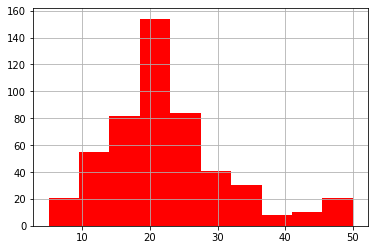

In [5]:
boston_data.MEDV.hist(color="red");

This does not look normal due to that right tail. we can try to verify statistically:

## Statistical test

In [6]:
from scipy.stats.mstats import normaltest #D'Agostino K^2 Test

Without getting into matematical details

*   This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say:
    *   This test outputs a "p-value". The *higher* this p-value is the *closer* the distribution is to normal.
    *   Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


In [7]:
#we make the test with the target variable
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

p-value *extremely* low, our target variable is not normally distributed

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed:

*  Log
*  Square root
*  Box cox


## Log transform


The log transform can transform data that is significantly skewed right to be more normally distributed:


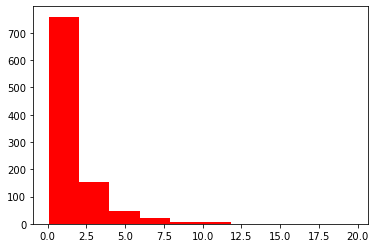

In [8]:
#we call the plot_exponential_data() function to try the log tranform
data = plot_exponential_data()

now we see the data is not normally distributed, we apply a log tranform to tranform it 

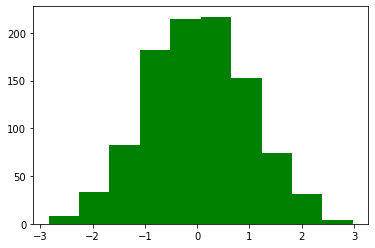

In [9]:
plt.hist(np.log(data), color="green");

we apply the log transform to Boston data target variable 


In [10]:
log_medv = np.log(boston_data.MEDV)

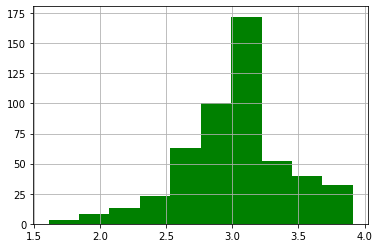

In [11]:
log_medv.hist(color="green");

In [12]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640697, pvalue=0.00018245472768345307)

it's closer, but still not normal

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

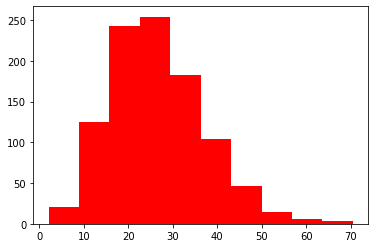

In [13]:
#we call the plot_square_normal_data() function
data = plot_square_normal_data()

slightly skewed right


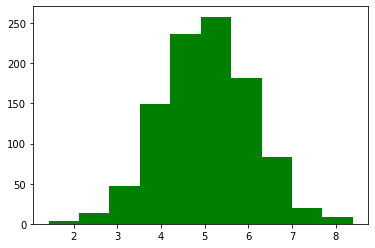

In [14]:
#now we colve this by applying the square root tranformation 
plt.hist(np.sqrt(data), color="green");

we apply the square root tranformation to the Boston data target variable and test whether the result is normally distributed.


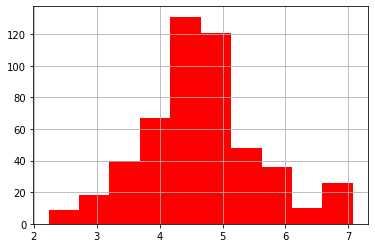

In [15]:
#first we plot the distribution of the target variable
np.sqrt(boston_data.MEDV).hist(color="red")

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <a list of 10 Patch objects>)

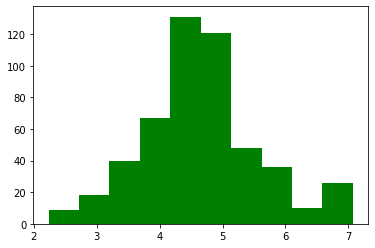

In [16]:
#now we apply the solution and we plot it 
sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv, color="green")

In [17]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

we see it's closer

## Box cox


The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

In [18]:
#we import the library 
from scipy.stats import boxcox

In [19]:
#we appyl the box cox transformation and save it in the variable boxcox_medv
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [20]:
lam

0.2166209012915364

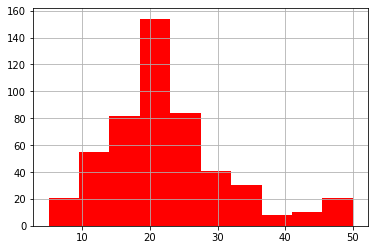

In [21]:
#we plot before the transformation
boston_data['MEDV'].hist(color="red");

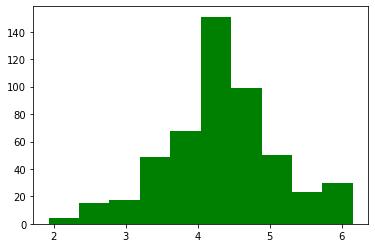

In [22]:
#we plot the target varibale with the transformation made 
plt.hist(boxcox_medv, color="green");

In [23]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

we see is significantly more normally distributed (according to p value) than the other two distributions, is even above 0.05 even

now we have a normally distributed y-variable, let's try a regression

## Testing regression:


In [24]:
#we import the neccesary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [25]:
lr = LinearRegression()

we reload clean version of boston_data

In [26]:
boston_data = boston_dataframe()
boston_data.shape

(506, 14)

same steps as before.


create X and y

In [27]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

we create Polynomial Features


In [28]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [29]:
X_pf.shape

(506, 104)

we make Train test split step

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

we fit StandardScaler on X_train as before


In [31]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [32]:
#we make the box cox transformation beacause it was the best solution
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [33]:
y_train_bc.shape

(354,)

In [34]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

Box cox has an inverse transformation as well

In [35]:
from scipy.special import inv_boxcox

In [36]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [37]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [38]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Exactly the same, as we would hope

In [39]:
#we make the inverse transformation to the y_pred_bc to calculate the r2_score  
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

0.8794001851338585

We determine the R^2 of a LinearRegression without the box cox transformation to see if it's higher or lower

In [40]:
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)

0.8555202098064191

We see that without the box cox tranformation in the target variable the model has predict a lower r2_score.